In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('world_population.csv')
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


# Penyajian Data World Population Menggunakan Berbagai Bentuk Diagram

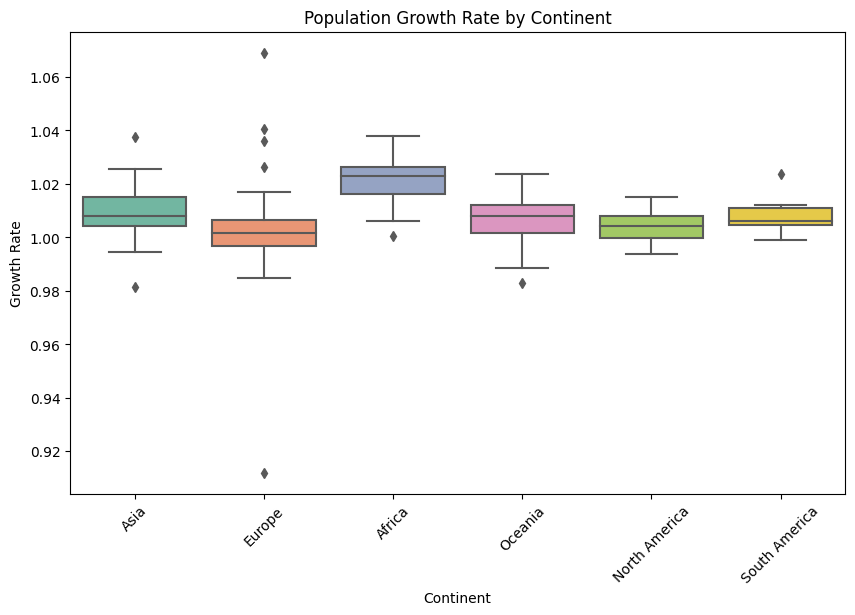

In [ ]:
# Distribusi tingkat pertumbuhan populasi di setiap benua
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Growth Rate', data=df, palette='Set2')
plt.title('Population Growth Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

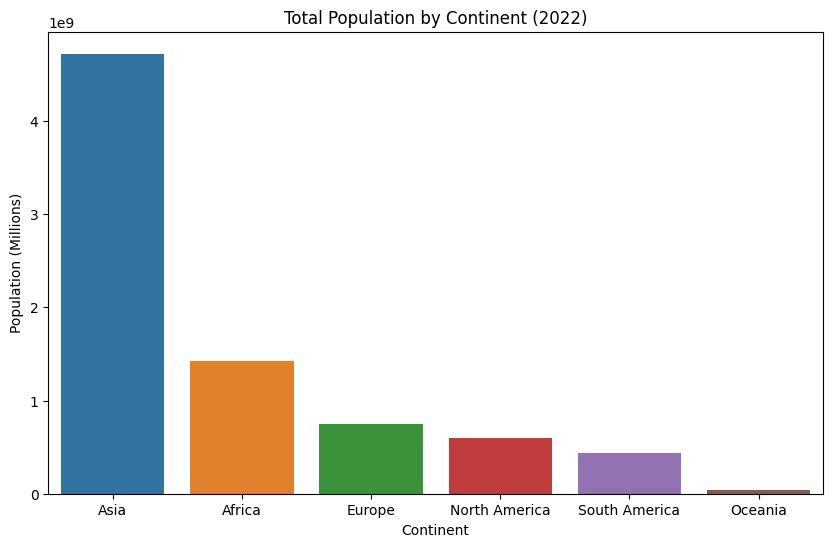

In [ ]:
# Total populasi berdasarkan benua pada tahun 2022
continent_pop = df.groupby("Continent")["2022 Population"].sum().reset_index()
continent_order = continent_pop.sort_values(by="2022 Population", ascending=False)["Continent"].values

plt.figure(figsize=(10, 6))
sns.barplot(x="Continent", y="2022 Population", data=continent_pop, order=continent_order)
plt.title("Total Population by Continent (2022)")
plt.xlabel("Continent")
plt.ylabel("Population (Millions)")
plt.show()

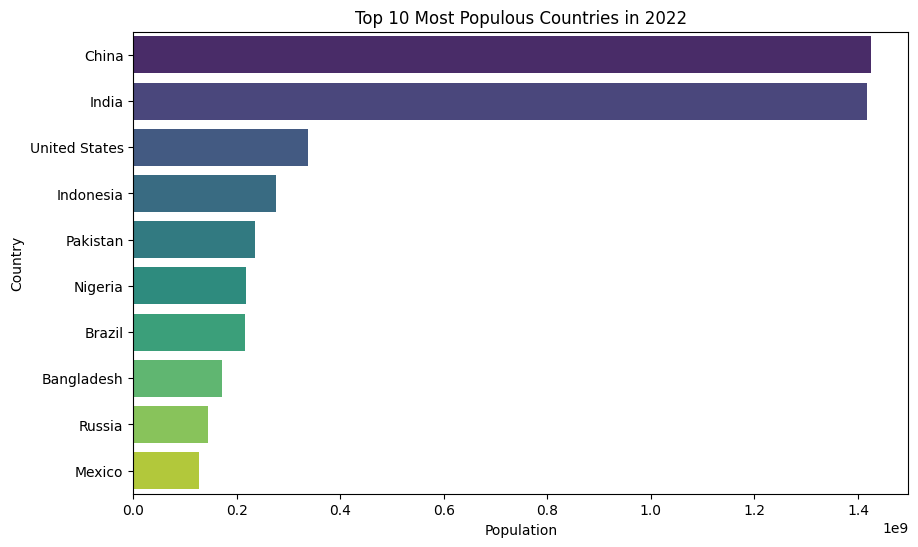

In [ ]:
# Diagram Bar: 10 negara dengan populasi terbesar pada tahun 2022
top_10_populated = df.nlargest(10, '2022 Population')
plt.figure(figsize=(10, 6))
sns.barplot(x='2022 Population', y='Country/Territory', data=top_10_populated, palette='viridis')
plt.title('Top 10 Most Populous Countries in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

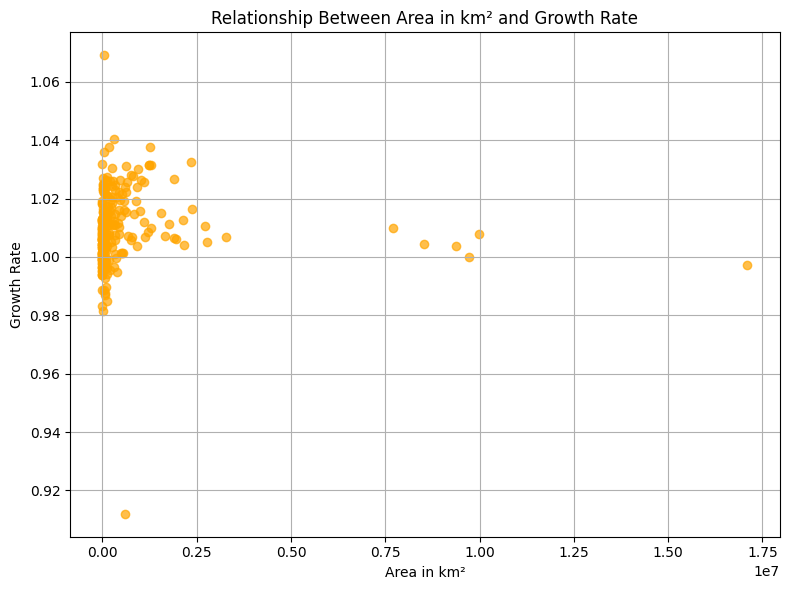

In [ ]:
# Hubungan antara luas wilayah negara dengan tingkat pertumbuhan populasi
plt.figure(figsize=(8, 6))
plt.scatter(df['Area (km²)'], df['Growth Rate'], color='orange', alpha=0.7)
plt.xlabel('Area in km²')
plt.ylabel('Growth Rate')
plt.title('Relationship Between Area in km² and Growth Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

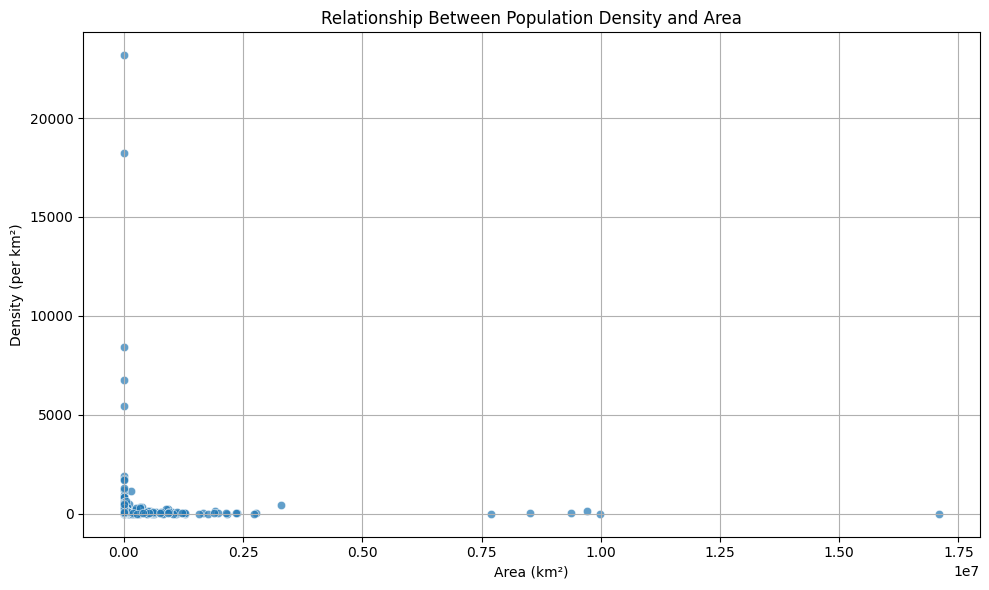

In [ ]:
# Hubungan antara luas wilayah negara dengan kepadatan penduduk
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Area (km²)", y="Density (per km²)", data=df, alpha=0.7)
plt.title("Relationship Between Population Density and Area")
plt.xlabel("Area (km²)")
plt.ylabel("Density (per km²)")
plt.grid(True)
plt.tight_layout()
plt.show()

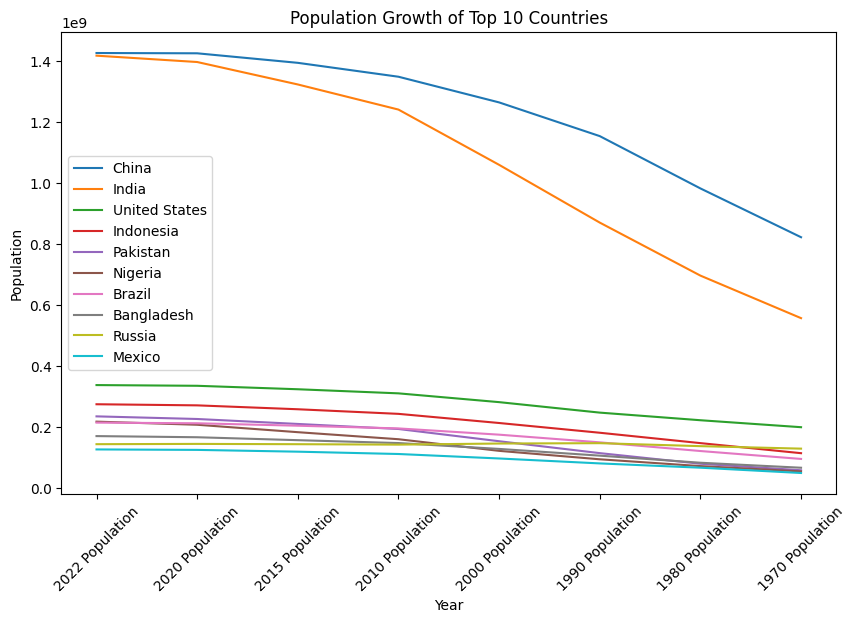

In [ ]:
# Tren pertumbuhan populasi dari tahun 1990 sampai 2022 untuk 10 negara dengan populasi terbesar pada tahun 2022
top_10_countries_growth = df.nlargest(10, '2022 Population')
plt.figure(figsize=(10, 6))
for index, row in top_10_countries_growth.iterrows():
    plt.plot(row.index[5:13], row.values[5:13], label=row['Country/Territory'])

plt.legend()
plt.title('Population Growth of Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

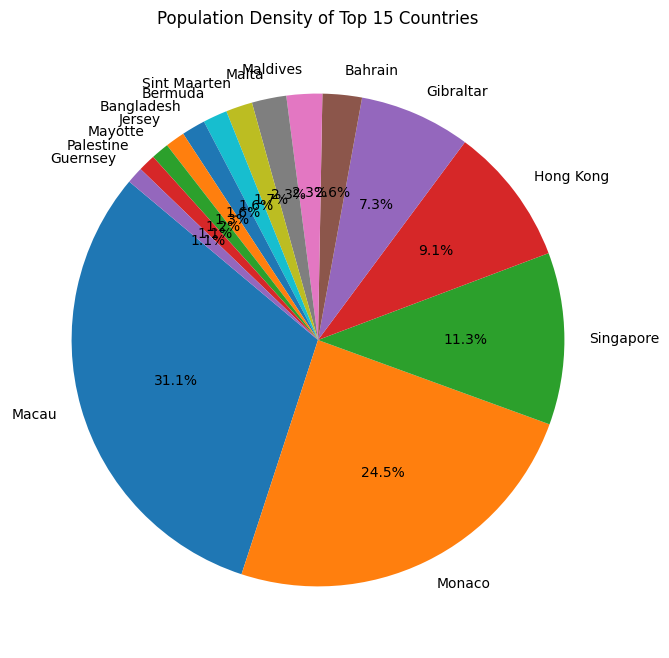

In [ ]:
# 15 negara berdasarkan nilai kepadatan yang tertinggi
plt.figure(figsize=(8, 8))
top_15_density = density_rank.head(15)
plt.pie(top_15_density['Density (per km²)'], labels=top_15_density['Country/Territory'], autopct='%1.1f%%', startangle=140)
plt.title('Population Density of Top 15 Countries')
plt.show()

# New Section

In [ ]:
duplikasi = df[df.duplicated()]
if not duplikasi.empty:
  print("Duplikasi Data:")
  print(duplikasi)
else:
  print("Tidak Ada Duplikasi Dalam Dataset")

Tidak Ada Duplikasi Dalam Dataset


In [ ]:
missing_values = df.isnull().sum()
print("Kolom Dengan Missing Values :")
print(missing_values[missing_values > 0])

Kolom Dengan Missing Values :
Series([], dtype: int64)


In [ ]:
continent_counts = df["Continent"].value_counts()
continent_counts

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

In [ ]:
# Benua dengan negara terbanyak
continent_plus = continent_counts.idxmax()
print("Benua dengan negara terbanyak :")
print(continent_plus)

Benua dengan negara terbanyak :
Africa


In [ ]:
# Benua dengan negara paling sedikit
continent_minus = continent_counts.idxmin()
print("Benua dengan negara paling sedikit :")
print(continent_minus)

Benua dengan negara paling sedikit :
South America


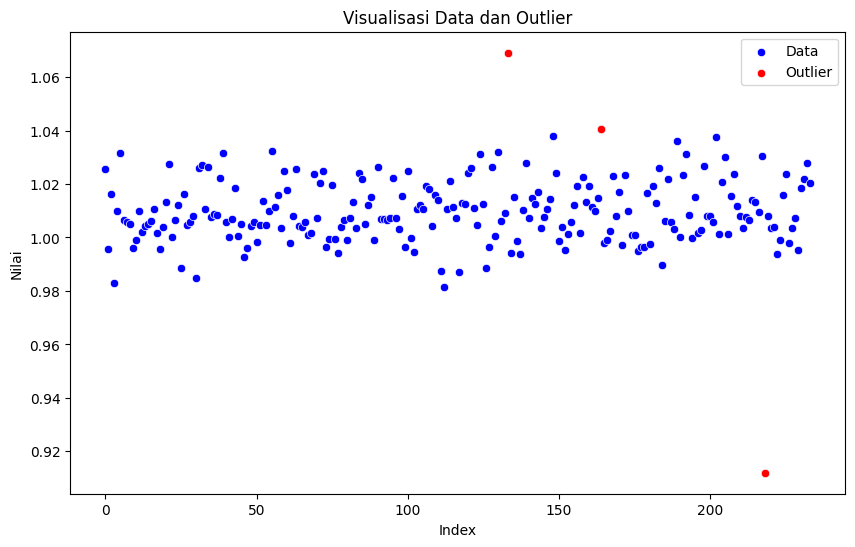

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Fungsi untuk membuat visualisasi data dan outlier
def visualize_outliers(df):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.index, y=df, color='blue', label='Data')

    # Menandai outlier dengan warna merah
    outliers = detect_outliers_iqr(df)
    sns.scatterplot(x=df.index[outliers], y=df[outliers], color='red', label='Outlier')

    plt.title('Visualisasi Data dan Outlier')
    plt.xlabel('Index')
    plt.ylabel('Nilai')
    plt.legend()
    plt.show()

visualize_outliers(df["Growth Rate"])

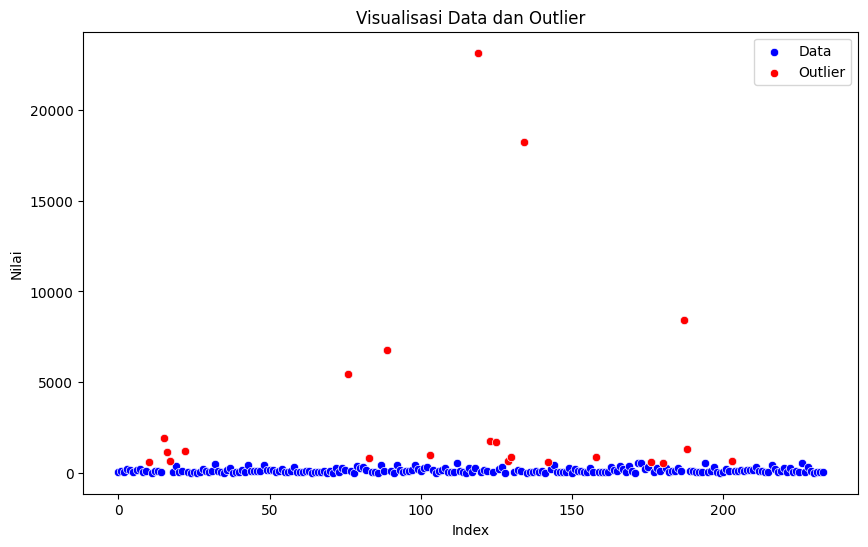

In [ ]:
visualize_outliers(df["Density (per km²)"])

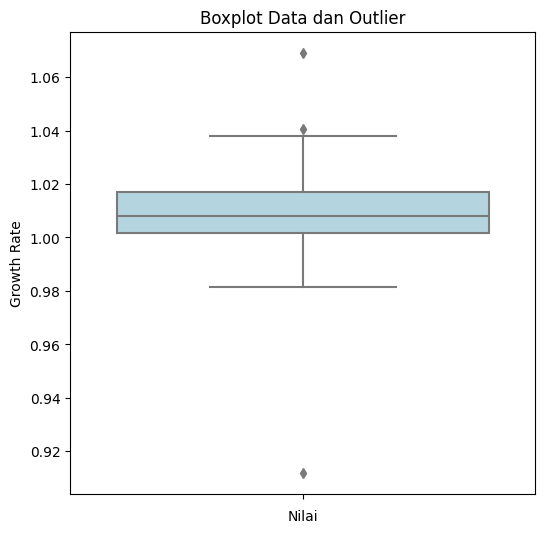

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Fungsi untuk membuat visualisasi data dan outlier dengan boxplot
def visualize_boxplot(df):
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df, color='lightblue', fliersize=5)
    plt.title('Boxplot Data dan Outlier')
    plt.xlabel('Nilai')
    plt.show()

# Pastikan df["Growth Rate"] adalah satu kolom dalam dataframe
visualize_boxplot(df["Growth Rate"])


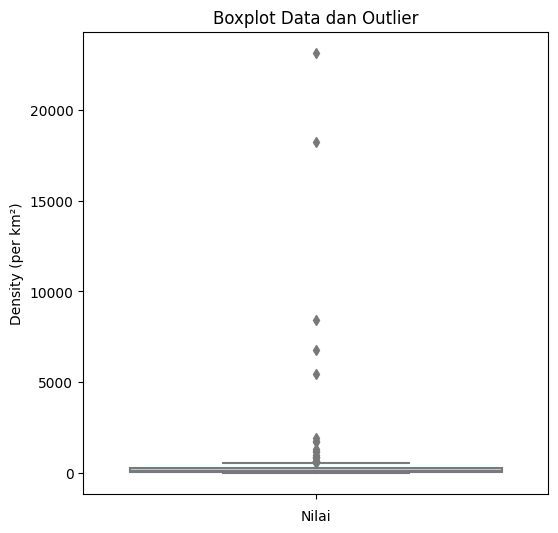

In [ ]:
visualize_boxplot(df["Density (per km²)"])

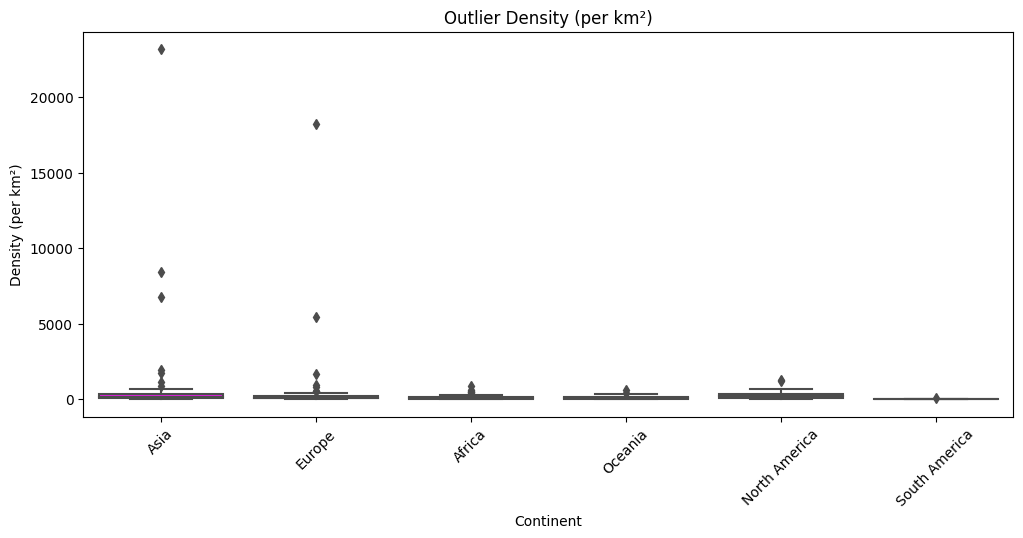

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Continent', y='Density (per km²)', data=df, color='magenta')
plt.title('Outlier Density (per km²)')
plt.xlabel('Continent')
plt.ylabel('Density (per km²)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
RTM 4

<ipython-input-26-4d6d2d76ae55>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


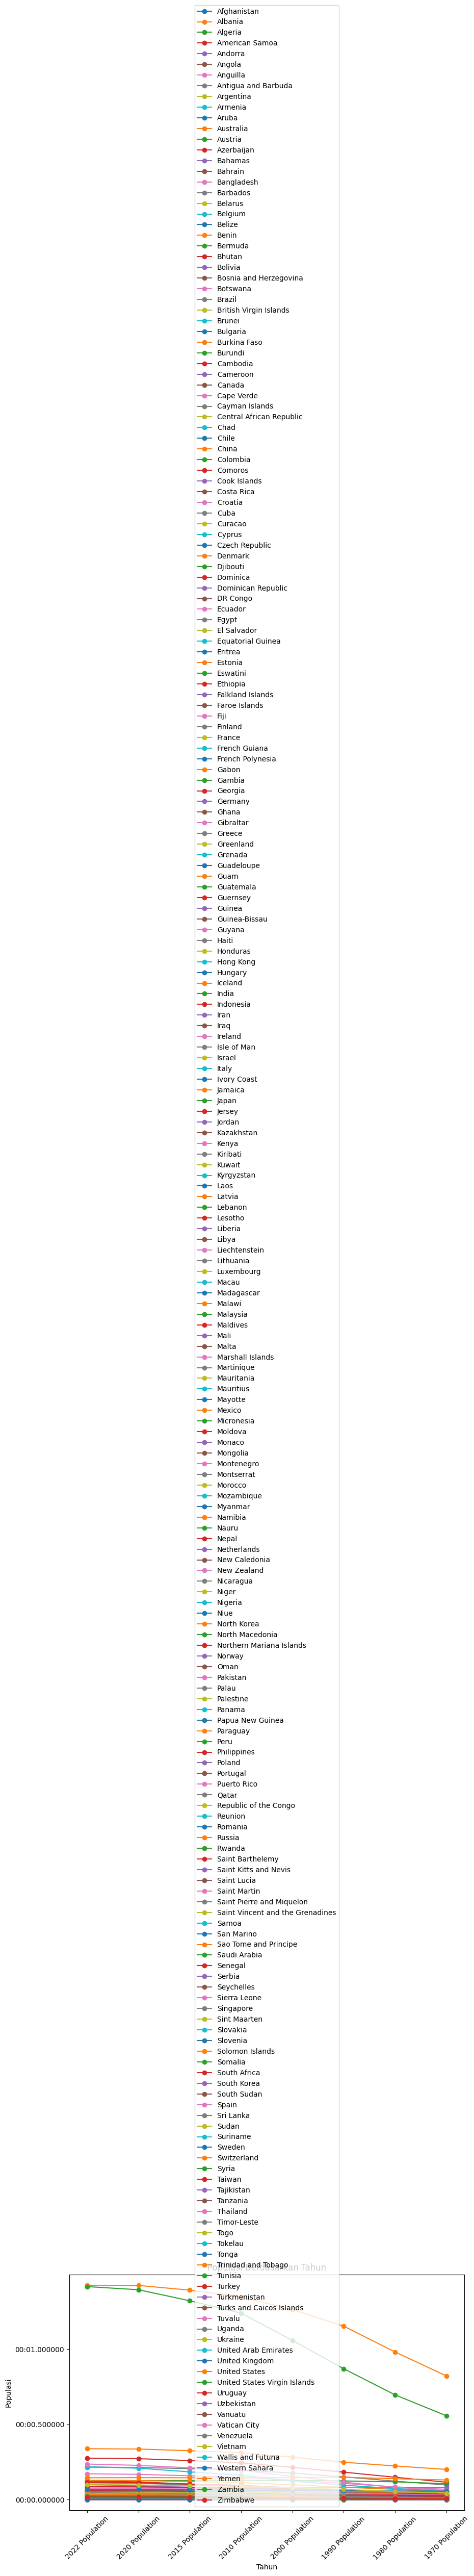

In [ ]:
# Baca data dari file
df = 'world_population.csv'
df = pd.read_csv(df)

# Ambil kolom yang ingin divisualisasikan
columns_to_plot = ['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                   '2000 Population', '1990 Population', '1980 Population', '1970 Population']

# Konversi kolom-kolom tersebut ke format datetime
for col in columns_to_plot:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Atur indeks ke kolom 'Country/Territory'
df.set_index('Country/Territory', inplace=True)

# Transposisi data untuk mempermudah visualisasi
df = df[columns_to_plot].T

# Plotting data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Populasi Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Populasi')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Baca data dari file
df = 'world_population.csv'
df = pd.read_csv(df)

# Konversi kolom 'Density (per km²)' ke format datetime
df['Density (per km²)'] = pd.to_datetime(df['Density (per km²)'])

# Set kolom 'Density (per km²)' sebagai indeks
df.set_index('Density (per km²)', inplace=True)

# Pengelompokan data time series berdasarkan bulan
df_monthly = df.resample('M').sum()

# Tampilkan hasil pengelompokan
df_monthly

<ipython-input-12-a98b6c14cbdd>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').sum()


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Growth Rate,World Population Percentage
Density (per km²),,,,,,,,,,,,
1970-01-31,27495,7973413042,7839250603,7424809761,6983784998,6147055703,5314191665,4442400371,3694136661,136059156,236.2411,99.93


In [ ]:
# Baca data dari file CSV
df = 'world_population.csv'
df = pd.read_csv(df)

# Konversi kolom 'Density (per km²)' ke format datetime
df['Density (per km²)'] = pd.to_datetime(df['Density (per km²)'])

# Set kolom 'Density (per km²)' sebagai indeks
df.set_index('Density (per km²)', inplace=True)

# Pengelompokan data time series berdasarkan hari
df_daily = df.resample('D').sum()

# Tampilkan hasil pengelompokan
df_daily

<ipython-input-20-b02e12e8b622>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum()


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Growth Rate,World Population Percentage
Density (per km²),,,,,,,,,,,,
1970-01-01,27495,7973413042,7839250603,7424809761,6983784998,6147055703,5314191665,4442400371,3694136661,136059156,236.2411,99.93


In [ ]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv('world_population.csv',sep;)

# Konversi kolom '2022 Population' ke format datetime
df['2022 Population'] = pd.to_datetime(df['2022 Population'])  # Pastikan '2022 Population' sesuai dengan kolom waktu yang ingin Anda gunakan

# Set kolom '2022 Population' sebagai indeks
df.set_index('2022 Population', inplace=True)

# Pengelompokan data time series berdasarkan minggu
df_weekly = df.resample('W').sum()

# Tampilkan hasil pengelompokan
print(df_weekly)

SyntaxError: ignored

<ipython-input-22-0ab296546f0f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Country/Territory'] = selected_columns['Country/Territory'].astype(str)


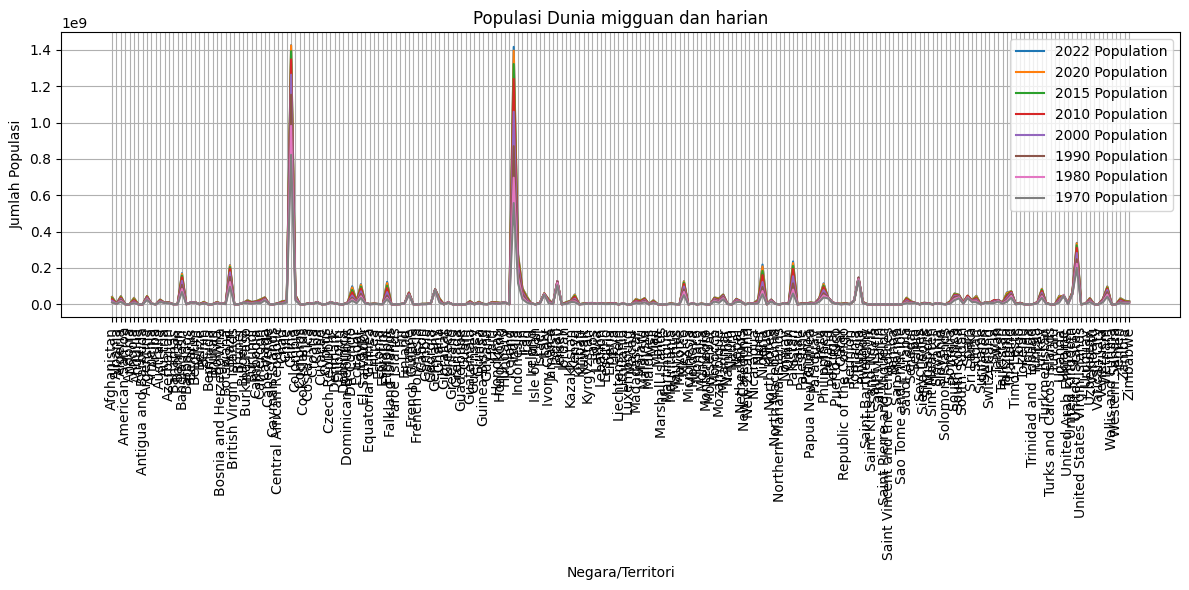

In [ ]:
# Baca data dari file world_population.csv
df = pd.read_csv('world_population.csv')

# Memilih kolom-kolom untuk diplot (misalnya, populasi dalam beberapa tahun tertentu)
selected_columns = df[['Rank', 'CCA3', 'Country/Territory', '2022 Population', '2020 Population',
                       '2015 Population', '2010 Population', '2000 Population', '1990 Population',
                       '1980 Population', '1970 Population']]

# Mengubah format kolom 'Country/Territory' menjadi string (jika perlu)
selected_columns['Country/Territory'] = selected_columns['Country/Territory'].astype(str)

# Membuat plot
plt.figure(figsize=(12, 6))
for column in selected_columns.columns[3:]:
    plt.plot(selected_columns['Country/Territory'], selected_columns[column], label=column)

plt.title('Populasi Dunia migguan dan harian')
plt.xlabel('Negara/Territori')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp

# Memuat data dari file CSV
df = pd.read_csv('world_population.csv')

# Ambil kolom kepadatan penduduk
population_density = df['Density (per km²)'].dropna()

# Tentukan nilai rata-rata yang diuji (misalnya, 0 jika Anda ingin memeriksa apakah rata-rata positif)
null_hypothesis_value = 0

# Hitung rata-rata dari kepadatan penduduk
mean_population_density = population_density.mean()

# Lakukan uji hipotesis
t_stat, p_value = ttest_1samp(population_density, null_hypothesis_value, alternative='greater')

# Tentukan tingkat signifikansi
alpha = 0.05

# Tampilkan hasil uji hipotesis
print(f'Rata-rata dari kepadatan penduduk: {mean_population_density}')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("Hipotesis Nol Ditolak. Ada cukup bukti bahwa rata-rata kepadatan penduduk lebih besar dari nilai yang diuji.")
else:
    print("Hipotesis Nol Diterima. Tidak ada cukup bukti untuk menyatakan bahwa rata-rata kepadatan penduduk lebih besar dari nilai yang diuji.")

Rata-rata dari kepadatan penduduk: 452.1270435897435
T-Statistic: 3.347437458358648
P-Value: 0.000475435603049331
Hipotesis Nol Ditolak. Ada cukup bukti bahwa rata-rata kepadatan penduduk lebih besar dari nilai yang diuji.


In [ ]:
import math

def pearson_correlation(x, y):
    n = len(x)

    # Hitung jumlah dari X dan Y
    sum_x = sum(x)
    sum_y = sum(y)

    # Hitung jumlah dari X^2 dan Y^2
    sum_x_squared = sum([i ** 2 for i in x])
    sum_y_squared = sum([i ** 2 for i in y])

    # Hitung jumlah dari Xi * Yi
    sum_xy = sum([x[i] * y[i] for i in range(n)])

    # Hitung nilai korelasi Pearson
    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = math.sqrt(((n * sum_x_squared) - (sum_x ** 2)) * ((n * sum_y_squared) - (sum_y ** 2)))

    correlation = numerator / denominator

    return correlation

# Contoh penggunaan dengan data dari kolom 'Density (per km²)' dan 'Area (km²)'
density_per_km = df['Density (per km²)'].dropna().tolist()
area_km = df['Area (km²)'].dropna().tolist()

correlation_coefficient = pearson_correlation(density_per_km, area_km)

print(f'Nilai Korelasi Pearson: {correlation_coefficient}')

Nilai Korelasi Pearson: -0.06312785050059672


MAPE: 1860.7770643559452


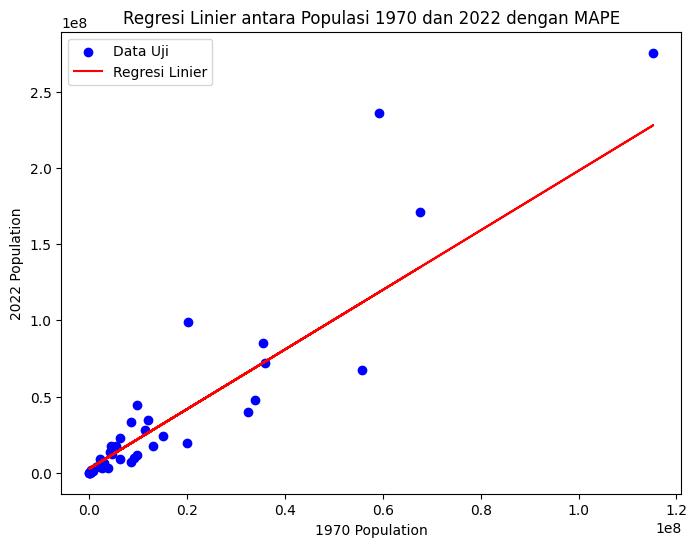

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Memuat data populasi dari world_population.csv
data_population = pd.read_csv('world_population.csv')

# Memilih kolom '1970 Population' sebagai variabel independen (X) dan '2022 Population' sebagai variabel dependen (y) untuk analisis regresi
X = data_population['1970 Population'].values.reshape(-1, 1)
y = data_population['2022 Population']

# Membagi data menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model_regresi = LinearRegression()
model_regresi.fit(X_latih, y_latih)

# Melakukan prediksi dengan model pada data uji
y_prediksi = model_regresi.predict(X_uji)

# Menghitung Mean Absolute Percentage Error (MAPE)
def hitung_mape(y_asli, y_prediksi):
    return np.mean(np.abs((y_asli - y_prediksi) / y_asli)) * 100

mape = hitung_mape(y_uji, y_prediksi)
print(f'MAPE: {mape}')

# Visualisasi hasil regresi
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_uji, y_uji, color='blue', label='Data Uji')
plt.plot(X_uji, y_prediksi, color='red', label='Regresi Linier')
plt.xlabel('1970 Population')
plt.ylabel('2022 Population')
plt.title('Regresi Linier antara Populasi 1970 dan 2022 dengan MAPE')
plt.legend()
plt.show()

# RTM 3

# DISTRIBUSI UNIFORM
Berapa persentase probabilitas x < 5 berdasarkan persamaan dalam distribusi uniform dengan menggunakan kode script pemrograman Python secara scratch- cari nilai a dan b.

- Gunakan persamaan mean dan standard deviation sebagai bekal untuk mendapatkan nilai a dan b sesuai dengan sifat dasar statistika dalam distribusi normal.
- Selanjutnya hitung probabilitas distribusi uniform berdasarkan nilai a dan b yang sudah didapatkan menggunakan persamaan.
- Visualisasikan dataset menggunakan histogram, periksalah apakah dataset berdistribusi uniform atau tidak.

Nilai a: 0.50
Nilai b: 234.50
Probabilitas P(X < 5) = 0.02
Persentase Probabilitas P(X < 5) = 1.92%


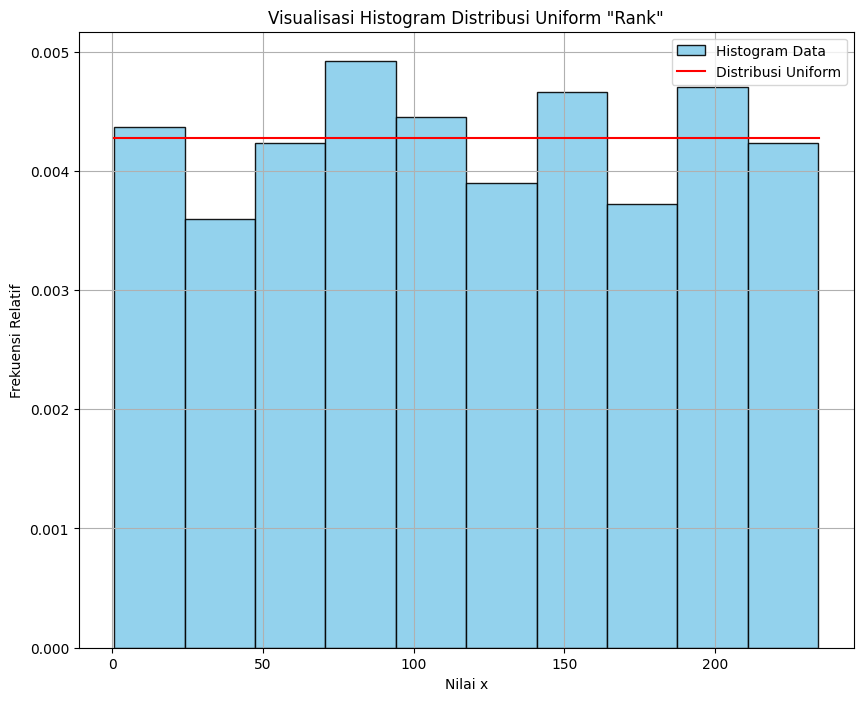

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Membaca data dari file CSV
df = pd.read_csv('world_population.csv')

# Mengambil kolom 'Rank'
rank = df['Rank']

# Fungsi untuk mencari nilai a dan b
def equations(vars, mean, std_dev):
    a, b = vars
    eq1 = (a + b) / 2 - mean
    eq2 = (b - a) / np.sqrt(12) - std_dev
    return [eq1, eq2]

# Fungsi untuk menghitung CDF
def uniform_cdf(x, a, b):
    return (x - a) / (b - a)

# Menghitung mean dan standard deviation
mean_rank = np.mean(rank)
std_dev_rank = np.std(rank)

# Mencari nilai a dan b
initial_guess = [0, 1]  # Initial guess for a and b
a, b = fsolve(equations, initial_guess, args=(mean_rank, std_dev_rank))

# Menghasilkan sampel acak dari distribusi seragam
samples = np.random.uniform(a, b, size=1000)

# Menghitung probabilitas x < 5
probability_x_less_than_5 = (5 - a) / (b - a)

# Mengubah probabilitas menjadi persentase
percentage_probability = probability_x_less_than_5 * 100

print(f"Nilai a: {a:.2f}")
print(f"Nilai b: {b:.2f}")
print(f"Probabilitas P(X < 5) = {probability_x_less_than_5:.2f}")
print(f"Persentase Probabilitas P(X < 5) = {percentage_probability:.2f}%")

# Visualisasi dengan histogram
plt.figure(figsize=(10, 8))
plt.hist(samples, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.9, label='Histogram Data')

# Plot distribusi uniform teoritis
x_range = np.linspace(a, b, 100)
plt.plot(x_range, np.ones_like(x_range) / (b - a), color='red', label='Distribusi Uniform')

# Menambah label dan judul
plt.xlabel('Nilai x')
plt.ylabel('Frekuensi Relatif')
plt.title('Visualisasi Histogram Distribusi Uniform "Rank"')

# Menampilkan visualisasi
plt.grid(True)
plt.legend()
plt.show()


# DISTRIBUSI NORMAL
- Hitunglah persamaan f(x) dari nilai x di atas berdasarkan persamaan dalam distribusi normal dengan menggunakan kode script pemrograman Python secara scratch.
- Gunakan persamaan distribusi normal
- Visualisasikan antara nilai x dan f(x) menggunakan diagram garis, periksalah apakah dataset berdistribusi normal atau tidak.

        x      f(x)
0    0.52  0.232778
1    0.04  0.227234
2    0.56  0.232419
3    0.00  0.225974
4    0.00  0.225974
..    ...       ...
229  0.00  0.225974
230  0.01  0.226300
231  0.42  0.233119
232  0.25  0.231877
233  0.20  0.231078

[234 rows x 2 columns]


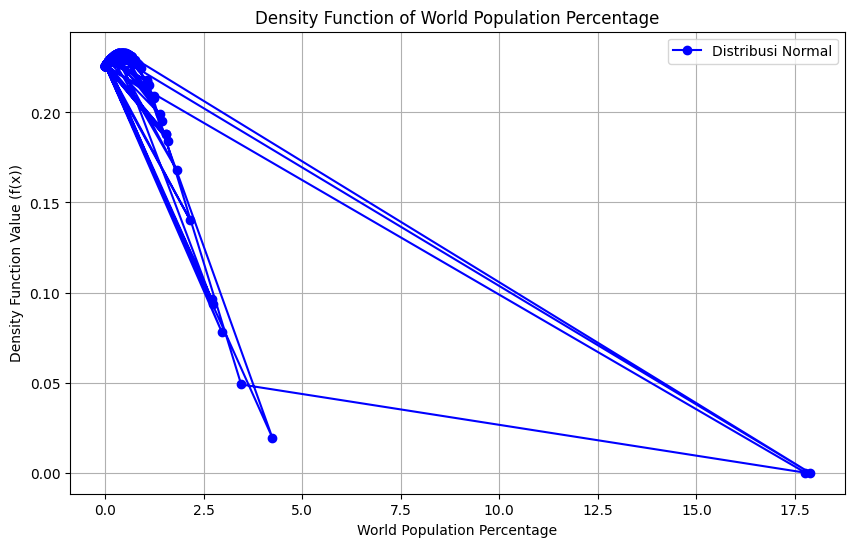

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Membaca data dari file CSV
df = pd.read_csv('world_population.csv')

# Mengambil kolom 'Rank'
worldpop = df['World Population Percentage']

# Menghitung nilai rata-rata (mean) dan simpangan baku sampel (standard deviation)
mean = np.mean(worldpop)
std_dev = np.std(worldpop)

# Menghitung nilai f(x) untuk setiap nilai x menggunakan scipy
fx_values = [norm.pdf(x, mean, std_dev) for x in worldpop]

# Membuat dataframe dari hasil perhitungan
df = pd.DataFrame({'x': worldpop, 'f(x)': fx_values})

# Menampilkan tabel
print(df)

# Membuat visualisasi diagram garis
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['f(x)'], marker='o', linestyle='-',label='Distribusi Normal', color='b')

# Menambah label dan judul
plt.xlabel('World Population Percentage')
plt.ylabel('Density Function Value (f(x))')
plt.title('Density Function of World Population Percentage')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

# SKEWNESS

          x       f(x)
0    1.0257  14.414890
1    0.9957  17.410202
2    1.0164  26.215679
3    0.9831   4.186696
4    1.0100  29.854151
..      ...        ...
229  0.9953  16.869232
230  1.0184  24.014455
231  1.0217  19.785056
232  1.0280  11.537083
233  1.0204  21.510297

[234 rows x 2 columns]


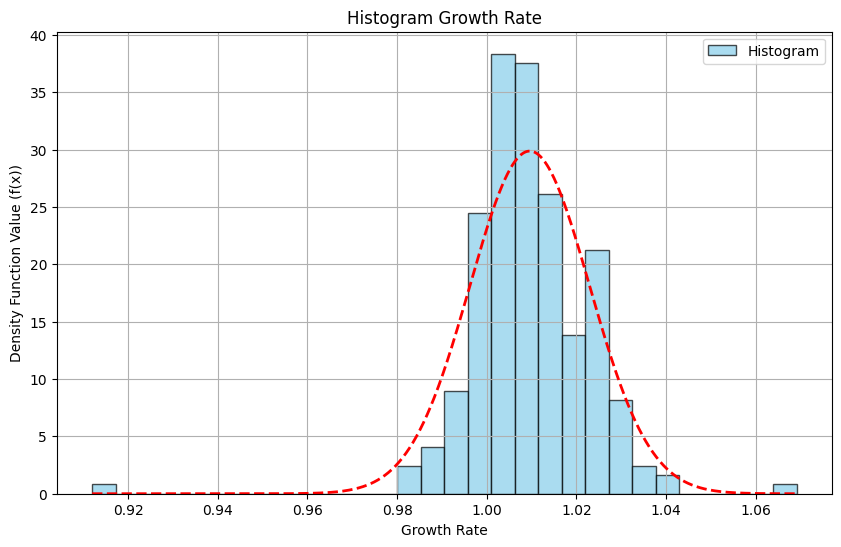

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew

# Membaca data dari file CSV
df = pd.read_csv('world_population.csv')

# Mengambil kolom 'World Population Percentage'
growthrate = df['Growth Rate']

# Menghitung nilai rata-rata (mean) dan simpangan baku (standar deviasi)
mean_skew = np.mean(growthrate)
std_dev_skew = np.std(growthrate)

# Menghitung nilai f(x) untuk setiap nilai x
fx_val_skew = [norm.pdf(x, mean_skew, std_dev_skew) for x in growthrate]

# Membuat dataframe dari hasil perhitungan
ds = pd.DataFrame({'x': growthrate, 'f(x)': fx_val_skew})

# Menampilkan tabel
print(ds)

# Membuat visualisasi diagram garis
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(growthrate, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

# Plot distribusi normal
x_range = np.linspace(min(growthrate), max(growthrate), 1000)
normal_distribution = norm.pdf(x_range, mean_skew, std_dev_skew)
plt.plot(x_range, normal_distribution, color='red', linestyle='--', linewidth=2)

# Menambah label dan judul
plt.xlabel('Growth Rate')
plt.ylabel('Density Function Value (f(x))')
plt.title('Histogram Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Membaca data dari file CSV
df = pd.read_csv('world_population.csv')

# Mengambil kolom 'World Population Percentage'
growthrate = df['Growth Rate']

# Menghitung skewness menggunakan fungsi skew dari scipy.stats
skewness = skew(growthrate)

# Menampilkan hasil skewness
print(f'Skewness: {skewness:.2f}')

# Menentukan kecondongan distribusi
if skewness > 0:
    print('Distribusi miring ke kanan (positif skewness)')
elif skewness < 0:
    print('Distribusi miring ke kiri (negatif skewness)')
else:
    print('Distribusi simetris')

Skewness: -1.09
Distribusi miring ke kiri (negatif skewness)


# KURTOSIS

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Membaca data dari file CSV
df = pd.read_csv('world_population.csv')

# Mengambil kolom 'World Population Percentage'
growthrate = df['Growth Rate']

# Menghitung kurtosis menggunakan fungsi kurtosis dari scipy.stats
kurt = kurtosis(growthrate)

# Menampilkan hasil kurtosis
print(f'Kurtosis: {kurt:.2f}')

# Menentukan jenis distribusi
if kurt > 0:
    print('Distribusi leptokurtic (puncak lebih tajam, ekor lebih berat)')
elif kurt < 0:
    print('Distribusi platykurtic (puncak lebih datar, ekor lebih ringan)')
else:
    print('Distribusi mesokurtic (mirip dengan distribusi normal)')


Kurtosis: 12.20
Distribusi leptokurtic (puncak lebih tajam, ekor lebih berat)
